<a href="https://colab.research.google.com/github/SkAmeen18/SIM_Lab/blob/main/Lab_assignment1_1077.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# 1. Generate Dataset

np.random.seed(42)
shift = 77 % 5
data = 60 + np.random.randint(0, 15, size=12) + shift

print("Sample Data (Exam Scores):", data)

Sample Data (Exam Scores): [68 65 74 76 72 69 74 66 68 71 64 68]


In [6]:
# 2. Perform One-Sample t-test

hypothesized_mean = 65
t_stat, p_value = stats.ttest_1samp(data, hypothesized_mean)

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
df = n - 1

print("\n=== One-Sample t-Test Results ===")
print(f"Sample Mean       = {sample_mean:.2f}")
print(f"Hypothesized Mean = {hypothesized_mean}")
print(f"t-statistic       = {t_stat:.4f}")
print(f"Degrees of Freedom= {df}")
print(f"p-value           = {p_value:.4f}")


=== One-Sample t-Test Results ===
Sample Mean       = 69.58
Hypothesized Mean = 65
t-statistic       = 4.1511
Degrees of Freedom= 11
p-value           = 0.0016


In [7]:
# 3. Compute 95% Confidence Interval

confidence = 0.95
alpha = 1 - confidence
sem = stats.sem(data)

ci = stats.t.interval(confidence, df=df, loc=sample_mean, scale=sem)
print(f"\n95% Confidence Interval for Mean: {ci}")


95% Confidence Interval for Mean: (np.float64(67.1531968659404), np.float64(72.01346980072626))


In [8]:
# 4. Decision (α = 0.05)

alpha = 0.05
if p_value < alpha:
    decision = "Reject H0 (Sample mean is significantly different from 65)"
else:
    decision = "Fail to Reject H0 (No significant evidence that mean ≠ 65)"

print("\nDecision:", decision)


Decision: Reject H0 (Sample mean is significantly different from 65)


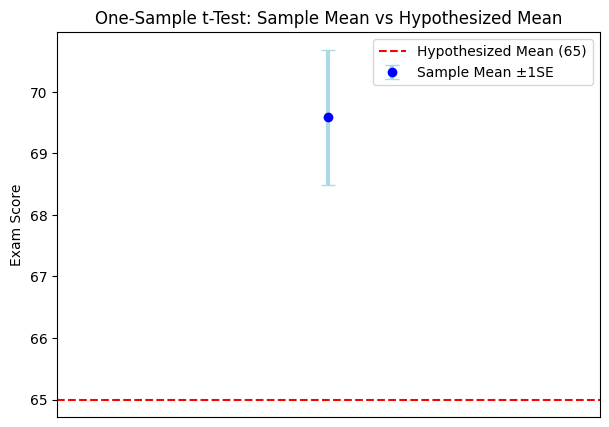

In [9]:
# 5. Visualization

plt.figure(figsize=(7,5))

plt.errorbar(1, sample_mean, yerr=sem, fmt='o', color='blue',
             ecolor='lightblue', elinewidth=3, capsize=5, label="Sample Mean ±1SE")

plt.axhline(y=hypothesized_mean, color='red', linestyle='--', label="Hypothesized Mean (65)")

plt.xlim(0, 2)
plt.xticks([])
plt.ylabel("Exam Score")
plt.title("One-Sample t-Test: Sample Mean vs Hypothesized Mean")
plt.legend()
plt.show()